In [1]:
# mounts google drive
#from google.colab import drive

#drive.mount('/gdrive')
#%cd /gdrive



In [2]:
# imports relevant packages and reads in data
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  
plt.rcParams['figure.figsize'] = [20, 10]

In [3]:
#data = pd.read_csv('/gdrive/Team Drives/IST 718/AviationData.txt', sep="|")
data = pd.read_csv('AviationData.txt', sep="|")

In [4]:
data.head()

Event Id   Investigation Type   Accident Number    Event Date   \
0  20190428X52843             Accident        GAA19CA228    04/28/2019    
1  20190429X52852             Accident        CEN19LA131    04/28/2019    
2  20190428X90622             Accident        GAA19CA235    04/27/2019    
3  20190430X12546             Accident        GAA19CA233    04/27/2019    
4  20190427X50317             Accident        GAA19CA227    04/27/2019    

             Location          Country     Latitude      Longitude   \
0         Lincoln, CA    United States    38.909167    -121.351389    
1          Quanah, TX    United States    34.363333     -99.826945    
2   Winston Salem, NC    United States    36.133611     -80.221945    
3          Juneau, AK    United States    58.491111    -134.455000    
4       Roosevelt, UT    United States    40.278334    -110.051389    

   Airport Code                      Airport Name  ...  \
0           LHM    Lincoln Rgnl/Karl Harder Field  ...   
1                                                  ...   
2           INT                    Smith Reynolds  ...   
3                                                  ...   
4           74V                    Roosevelt Muni  ...   

                Air Carrier   Total Fatal Injuries   Total Serious Injuries   \
0                                                                              
1                                                                              
2                                                                              
3   Coastal Helicopters Inc                                                    
4                                                                              

   Total Minor Injuries   Total Uninjured   Weather Condition   \
0                                                         IMC    
1                                       1                 VMC    
2                                       2                 VMC    
3                                                                
4                                       1                        

   Broad Phase of Flight   Report Status   Publication Date      
0                            Preliminary         05/01/2019      
1            MANEUVERING     Preliminary         05/01/2019      
2                            Preliminary         05/02/2019      
3                            Preliminary         05/03/2019      
4                            Preliminary         04/29/2019      

[5 rows x 32 columns]

In [5]:
# Remove spaces before and after the column names
print(data.columns) # column names before space removal
data.columns = [c.replace(' ', '') for c in data.columns]
print()
print(data.columns) # column names after space removal

Index(['Event Id ', ' Investigation Type ', ' Accident Number ',
       ' Event Date ', ' Location ', ' Country ', ' Latitude ', ' Longitude ',
       ' Airport Code ', ' Airport Name ', ' Injury Severity ',
       ' Aircraft Damage ', ' Aircraft Category ', ' Registration Number ',
       ' Make ', ' Model ', ' Amateur Built ', ' Number of Engines ',
       ' Engine Type ', ' FAR Description ', ' Schedule ',
       ' Purpose of Flight ', ' Air Carrier ', ' Total Fatal Injuries ',
       ' Total Serious Injuries ', ' Total Minor Injuries ',
       ' Total Uninjured ', ' Weather Condition ', ' Broad Phase of Flight ',
       ' Report Status ', ' Publication Date ', ' '],
      dtype='object')

Index(['EventId', 'InvestigationType', 'AccidentNumber', 'EventDate',
       'Location', 'Country', 'Latitude', 'Longitude', 'AirportCode',
       'AirportName', 'InjurySeverity', 'AircraftDamage', 'AircraftCategory',
       'RegistrationNumber', 'Make', 'Model', 'AmateurBuilt',
       'NumberofEn

In [6]:
print(data.shape)
# cleans up the AirCarrier Column
data['AirCarrier'] = data['AirCarrier'].apply(lambda x: x.upper())
data['AirCarrier'] = data['AirCarrier'].str.replace(pat = r'^\s', repl = '', regex = True)
data['AirCarrier'] = data['AirCarrier'].str.replace(pat = r'\s$', repl = '', regex = True)
data['AirCarrier'] = data['AirCarrier'].str.replace(pat = 'AIR LINES', repl = 'AIRLINES')
data['AirCarrier'] = data['AirCarrier'].str.replace(pat = 'USAIR', repl = 'US AIRWAYS')
data['AirCarrier'] = data['AirCarrier'].str.replace(pat = r'\)$', repl = '', regex = True)
data['AirCarrier'] = data['AirCarrier'].str.replace(pat = r'^\(DBA:\s', repl = '', regex = True)
data['AirCarrier'] = data['AirCarrier'].str.replace(pat = r'.+\s\(DBA\:\s', repl = '', regex = True)
data['AirCarrier'] = data['AirCarrier'].str.replace(pat = r'\,?\s*(LLC|INC|CO|IN)\.?\s?$', repl = '', regex = True)
data['AirCarrier'].unique()

(83044, 32)


array(['', 'COASTAL HELICOPTERS', 'K & S HELICOPTERS', ...,
       "JOEL FREDERICK'S MONARCH AIR", 'EXECUTIVE CHARTER SERVICE',
       'LANG AIR SERVICE'], dtype=object)

In [7]:
df1 = data.loc[data['AirCarrier'].notnull()]
df1.head()

EventId InvestigationType AccidentNumber     EventDate  \
0  20190428X52843          Accident     GAA19CA228    04/28/2019    
1  20190429X52852          Accident     CEN19LA131    04/28/2019    
2  20190428X90622          Accident     GAA19CA235    04/27/2019    
3  20190430X12546          Accident     GAA19CA233    04/27/2019    
4  20190427X50317          Accident     GAA19CA227    04/27/2019    

              Location          Country     Latitude      Longitude  \
0         Lincoln, CA    United States    38.909167    -121.351389    
1          Quanah, TX    United States    34.363333     -99.826945    
2   Winston Salem, NC    United States    36.133611     -80.221945    
3          Juneau, AK    United States    58.491111    -134.455000    
4       Roosevelt, UT    United States    40.278334    -110.051389    

  AirportCode                       AirportName ...           AirCarrier  \
0        LHM    Lincoln Rgnl/Karl Harder Field  ...                        
1                                               ...                        
2        INT                    Smith Reynolds  ...                        
3                                               ...  COASTAL HELICOPTERS   
4        74V                    Roosevelt Muni  ...                        

  TotalFatalInjuries TotalSeriousInjuries TotalMinorInjuries TotalUninjured  \
0                                                                             
1                                                                        1    
2                                                                        2    
3                                                                             
4                                                                        1    

  WeatherCondition BroadPhaseofFlight   ReportStatus PublicationDate     
0             IMC                       Preliminary      05/01/2019      
1             VMC        MANEUVERING    Preliminary      05/01/2019      
2             VMC                       Preliminary      05/02/2019      
3                                       Preliminary      05/03/2019      
4                                       Preliminary      04/29/2019      

[5 rows x 32 columns]

In [8]:
## Exploring Air Carrier Data

df1['AirCarrier'][1]

''

In [9]:
df1 = df1.loc[data['AirCarrier'] != '']
df1.head()

EventId InvestigationType AccidentNumber     EventDate  \
3   20190430X12546          Accident     GAA19CA233    04/27/2019    
23  20190416X94734          Accident     WPR19LA111    04/16/2019    
31  20190415X92143          Accident     ERA19LA152    04/15/2019    
48  20190412X45210          Accident     DCA19CA137    04/11/2019    
49  20190415X62333          Accident     ANC19LA016    04/11/2019    

             Location          Country     Latitude      Longitude  \
3         Juneau, AK    United States    58.491111    -134.455000    
23        Hauula, HI    United States    21.588333    -157.911944    
31        Dublin, GA    United States    32.000000     -82.000000    
48   Fort Meyers, FL    United States                                
49        Bethel, AK    United States    61.033334    -161.133334    

   AirportCode               AirportName ...             AirCarrier  \
3                                        ...    COASTAL HELICOPTERS   
23                                  N/A  ...      K & S HELICOPTERS   
31       48GA    Fairview Park Hospital  ...           AIR EVAC EMS   
48                                       ...        UNITED AIRLINES   
49                                  N/A  ...  YUTE COMMUTER SERVICE   

   TotalFatalInjuries TotalSeriousInjuries TotalMinorInjuries TotalUninjured  \
3                                                                              
23                                                                        4    
31                                                                        3    
48                                      1                               107    
49                                                                        4    

   WeatherCondition BroadPhaseofFlight   ReportStatus PublicationDate     
3                                        Preliminary      05/03/2019      
23             VMC             CRUISE    Preliminary      04/18/2019      
31             VMC            TAKEOFF    Preliminary      04/24/2019      
48                                       Preliminary      05/02/2019      
49             VMC             CRUISE    Preliminary      04/30/2019      

[5 rows x 32 columns]

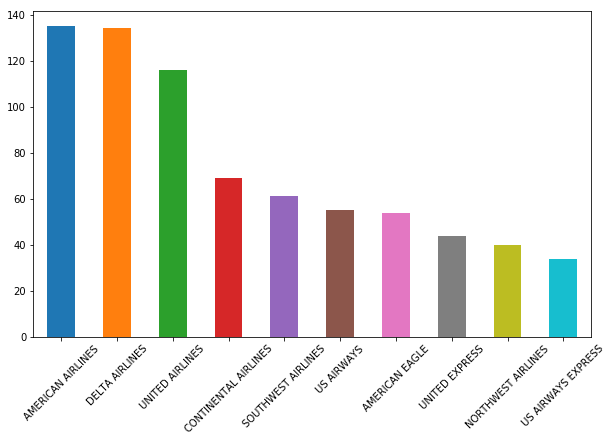

In [10]:
plt.rcParams['figure.figsize'] = [10, 6]
df1['AirCarrier'].value_counts()[:10].plot.bar(rot = 45)

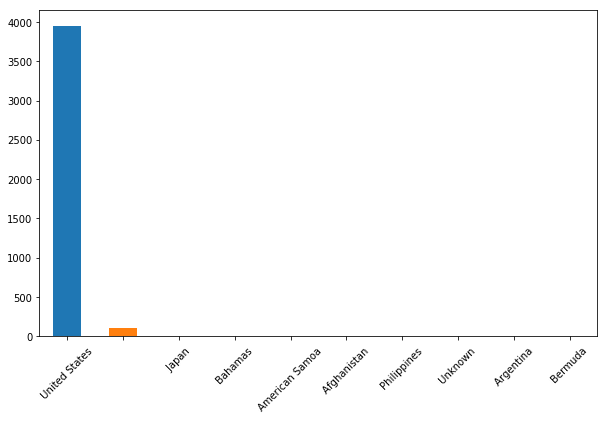

In [11]:
# looking at foreign countries in the 'airliner' subset
df1['Country'].value_counts()[:10].plot.bar(rot = 45)

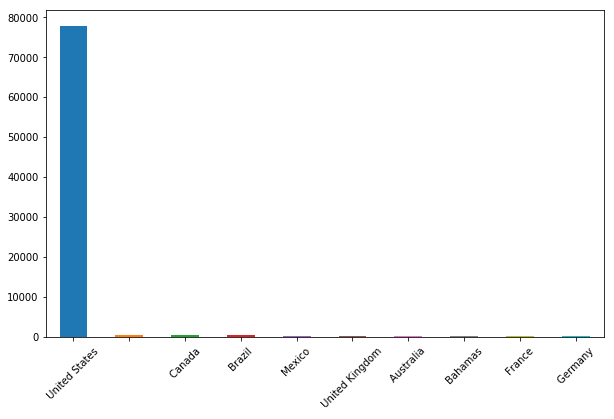

In [12]:
# looking at foreign countries in the full dataset 
data['Country'].value_counts()[:10].plot.bar(rot = 45)

In [13]:
df1['TotalFatalInjuries'].head(10)

3         
23        
31        
48        
49        
101       
136       
137       
141     2 
147       
Name: TotalFatalInjuries, dtype: object

In [14]:
df = data.copy()
df.head()

EventId InvestigationType AccidentNumber     EventDate  \
0  20190428X52843          Accident     GAA19CA228    04/28/2019    
1  20190429X52852          Accident     CEN19LA131    04/28/2019    
2  20190428X90622          Accident     GAA19CA235    04/27/2019    
3  20190430X12546          Accident     GAA19CA233    04/27/2019    
4  20190427X50317          Accident     GAA19CA227    04/27/2019    

              Location          Country     Latitude      Longitude  \
0         Lincoln, CA    United States    38.909167    -121.351389    
1          Quanah, TX    United States    34.363333     -99.826945    
2   Winston Salem, NC    United States    36.133611     -80.221945    
3          Juneau, AK    United States    58.491111    -134.455000    
4       Roosevelt, UT    United States    40.278334    -110.051389    

  AirportCode                       AirportName ...           AirCarrier  \
0        LHM    Lincoln Rgnl/Karl Harder Field  ...                        
1                                               ...                        
2        INT                    Smith Reynolds  ...                        
3                                               ...  COASTAL HELICOPTERS   
4        74V                    Roosevelt Muni  ...                        

  TotalFatalInjuries TotalSeriousInjuries TotalMinorInjuries TotalUninjured  \
0                                                                             
1                                                                        1    
2                                                                        2    
3                                                                             
4                                                                        1    

  WeatherCondition BroadPhaseofFlight   ReportStatus PublicationDate     
0             IMC                       Preliminary      05/01/2019      
1             VMC        MANEUVERING    Preliminary      05/01/2019      
2             VMC                       Preliminary      05/02/2019      
3                                       Preliminary      05/03/2019      
4                                       Preliminary      04/29/2019      

[5 rows x 32 columns]

In [15]:
# populating an empty column in the data
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [16]:
interesting_cols = ['InjurySeverity', 'AircraftDamage', 'AircraftCategory', 'AmateurBuilt', 'NumberofEngines', 'FARDescription', 'WeatherCondition', 'BroadPhaseofFlight']

for col in interesting_cols:
    df[col] = df[col].str.strip()

for col in interesting_cols:
    df_sub = df.dropna(subset=[col])
    print(col)
    print("Possible Responses")
    print(str(pd.unique(df_sub[col])))
    print("Number of responses: " + str(len(df_sub[col])))
    print("-------------------------------------------")

InjurySeverity
Possible Responses
['Unavailable' 'Non-Fatal' 'Fatal(1)' 'Fatal(6)' 'Fatal(2)' 'Fatal(3)'
 'Fatal(4)' 'Incident' 'Fatal(157)' 'Fatal(14)' 'Fatal(5)' 'Fatal(9)'
 'Fatal(10)' 'Fatal(112)' 'Fatal(71)' 'Fatal(12)' 'Fatal(11)' 'Fatal(7)'
 'Fatal(39)' 'Fatal(8)' 'Fatal(16)' 'Fatal(66)' 'Fatal(62)' 'Fatal(23)'
 'Fatal(224)' 'Fatal(150)' 'Fatal(43)' 'Fatal(162)' 'Fatal(58)'
 'Fatal(295)' 'Fatal(239)' 'Fatal(33)' 'Fatal(50)' 'Fatal(21)' 'Fatal(19)'
 'Fatal(153)' 'Fatal(127)' 'Fatal(28)' 'Fatal(77)' 'Fatal(42)'
 'Fatal(158)' 'Fatal(103)' 'Fatal(89)' 'Fatal(90)' 'Fatal(152)'
 'Fatal(228)' 'Fatal(17)' 'Fatal(13)' 'Fatal(24)' 'Fatal(88)' 'Fatal(65)'
 'Fatal(154)' 'Fatal(30)' 'Fatal(20)' 'Fatal(40)' 'Fatal(57)' 'Fatal(199)'
 'Fatal(114)' 'Fatal(102)' 'Fatal(96)' 'Fatal(49)' 'Fatal(124)'
 'Fatal(113)' 'Fatal(107)' 'Fatal(117)' 'Fatal(145)' 'Fatal(45)'
 'Fatal(160)' 'Fatal(121)' 'Fatal(15)' 'Fatal(104)' 'Fatal(25)'
 'Fatal(55)' 'Fatal(46)' 'Fatal(141)' 'Fatal(115)' 'Fatal(75)'
 'Fatal(2

In [17]:
# Separating the date column into year, month, day
df.EventDate = pd.to_datetime(df.EventDate)
df['month'] = df.EventDate.dt.month
df['day'] = df.EventDate.dt.day
df['year'] = df.EventDate.dt.year

In [18]:
# Changing the fatal column to 'Non-Fatal', 'None', 'Fatal', or 'Unknown', and adding a 'Fatal_Count' in a separate column
import re

fatal_counts = []
fatal_bools = []

for i in range(len(df)):
    fatal_resp = df.iloc[i]['InjurySeverity']
    if str(fatal_resp) == 'Non-Fatal':
        fatal_counts.append(0)
        fatal_bools.append("Non-Fatal")
    elif fatal_resp is not None:
        num = re.sub(r'\D', "", str(fatal_resp))
        if num == "":
            fatal_counts.append(np.nan)
            fatal_bools.append("Unknown")
        else:
            fatal_counts.append(int(num))
            fatal_bools.append("Fatal")
    else:
        fatal_counts.append(np.nan)
        fatal_bools.append("Unknown")

df['Fatal_Counts'] = fatal_counts
df['Fatal_Bool'] = fatal_bools

In [19]:
len(df[df['Fatal_Counts'] > 0])

16694

In [20]:
# deleting the empty column in the data
df = df.drop(df.columns[-6], axis=1)
df.head()

EventId InvestigationType AccidentNumber  EventDate  \
0  20190428X52843          Accident     GAA19CA228  2019-04-28   
1  20190429X52852          Accident     CEN19LA131  2019-04-28   
2  20190428X90622          Accident     GAA19CA235  2019-04-27   
3  20190430X12546          Accident     GAA19CA233  2019-04-27   
4  20190427X50317          Accident     GAA19CA227  2019-04-27   

              Location          Country     Latitude      Longitude  \
0         Lincoln, CA    United States    38.909167    -121.351389    
1          Quanah, TX    United States    34.363333     -99.826945    
2   Winston Salem, NC    United States    36.133611     -80.221945    
3          Juneau, AK    United States    58.491111    -134.455000    
4       Roosevelt, UT    United States    40.278334    -110.051389    

  AirportCode                       AirportName    ...     TotalUninjured  \
0        LHM    Lincoln Rgnl/Karl Harder Field     ...                NaN   
1         NaN                               NaN    ...                 1    
2        INT                    Smith Reynolds     ...                 2    
3         NaN                               NaN    ...                NaN   
4        74V                    Roosevelt Muni     ...                 1    

  WeatherCondition BroadPhaseofFlight   ReportStatus PublicationDate month  \
0              IMC                NaN   Preliminary      05/01/2019      4   
1              VMC        MANEUVERING   Preliminary      05/01/2019      4   
2              VMC                NaN   Preliminary      05/02/2019      4   
3              NaN                NaN   Preliminary      05/03/2019      4   
4              NaN                NaN   Preliminary      04/29/2019      4   

  day  year Fatal_Counts Fatal_Bool  
0  28  2019          NaN    Unknown  
1  28  2019          0.0  Non-Fatal  
2  27  2019          0.0  Non-Fatal  
3  27  2019          NaN    Unknown  
4  27  2019          0.0  Non-Fatal  

[5 rows x 36 columns]

In [21]:
# creating new dataframes with columns for city and state, taking apart the location column
# smaller one to use for state mapping, bigger one for regression plotting

#print('country is:',df.loc[0,'Country'])
#print('airport is:',df.loc[0,'AirportName']) 
print(df.shape)
dftemp=df[(df.Country==' United States ')].copy()  # using only US locations
print(dftemp.shape)
dfState= dftemp[['Location','Fatal_Counts','year','month']].copy()
dfState_full= dftemp[['Location','Fatal_Counts','year','WeatherCondition','BroadPhaseofFlight','AircraftDamage','AircraftCategory','Make','Model','AmateurBuilt','PurposeofFlight','AirCarrier']].copy()

print(dfState.shape)
print(dfState_full.shape)
dfState['Fatal_Counts'].fillna(0, inplace=True) # replace null values with 0
dfState_full['Fatal_Counts'].fillna(0, inplace=True) # replace null values with 0
dfState_full.reset_index
dfState=dfState.dropna()
dfState.reset_index


# CREDIT: https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns
dfState['City'], dfState['Abb'] = dfState['Location'].str.split(',',1).str  
dfState_full['City'], dfState_full['Abb'] = dfState_full['Location'].str.split(',',1).str  

print(dfState.loc[0,'Location'])    # notice many extra spaces
# .replace() only works on one cell; .str.replace() works on the whole column
dfState['Abb']=dfState['Abb'].str.replace(' ', '')
dfState_full['Abb']=dfState_full['Abb'].str.replace(' ', '')
print(dfState.shape)
print(dfState_full.shape)
print(dfState_full.head(2))
dfState.head(2)

(83044, 36)
(77863, 36)
(77863, 4)
(77863, 12)
 Lincoln, CA 
(77834, 6)
(77863, 14)
        Location  Fatal_Counts  year WeatherCondition BroadPhaseofFlight  \
0   Lincoln, CA            0.0  2019              IMC                NaN   
1    Quanah, TX            0.0  2019              VMC        MANEUVERING   

  AircraftDamage AircraftCategory           Make     Model AmateurBuilt  \
0    Substantial         Airplane      Champion     7GCAA            No   
1    Substantial         Airplane   Air Tractor    AT 602            No   

        PurposeofFlight AirCarrier      City Abb  
0                   NaN        NaN   Lincoln  CA  
1   Aerial Application         NaN    Quanah  TX  


Location  Fatal_Counts  year  month      City Abb
0   Lincoln, CA            0.0  2019      4   Lincoln  CA
1    Quanah, TX            0.0  2019      4    Quanah  TX

In [22]:
# merge with state full name for plotting and later geo mapping
states = pd.read_csv("states.csv")
states = states.rename(columns={"Abbreviation":"Abb"})
dfState = dfState.merge(states, on='Abb')
print(dfState.shape)
dfState.head(2)

(77576, 7)


Location  Fatal_Counts  year  month      City Abb       State
0   Lincoln, CA            0.0  2019      4   Lincoln  CA  California
1     Norco, CA            1.0  2019      4     Norco  CA  California

In [23]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.transform import factor_mark
from bokeh.palettes import Viridis256
import numpy as np
import matplotlib as plt
import matplotlib.cm as cm
output_notebook()

dfState.State = dfState.State.astype(str)
dfState.City = dfState.City.astype(str)
group = dfState.groupby(by=['State','City'])
source = ColumnDataSource(group)

#cmap=cm.get_cmap(plt.cm.viridis,52)
#newpalette = [plt.colors.rgb2hex(m) for m in cmap(np.arange(cmap.N))]

p = figure(plot_width=950, plot_height=700, title="Fatal Aviation Accidents, by City, by State",
           x_range=group, toolbar_location=None, tools="")
p.xaxis.axis_label = 'Cities Grouped by State'
p.yaxis.axis_label = 'Fatal Aviation Accidents'
p.xaxis.major_label_orientation = 1.2
p.xaxis.group_label_orientation = 1.2
p.y_range.range_padding = 0

index_cmap = factor_cmap('State_City', palette=Viridis256, factors=sorted(dfState.State.unique()), end=1)
p.vbar(x='State_City', top='Fatal_Counts_count', width=1, source=source,
       line_color="darkturquoise", fill_color=index_cmap)

show(p)

Loading BokehJS ...

In [24]:
groups=dfState.groupby('State')
StateFatal = groups['Fatal_Counts'].count()
StateFatal = pd.DataFrame(StateFatal)
#don't reset the index yet, I plan to save this to file
#the index will reset when re-reading the file from .csv
#StateFatal = StateFatal.reset_index(drop=False)
StateFatal.to_csv(r'StateFatal.csv')
StateFatal.head()

Fatal_Counts
State                   
Alabama             1093
Alaska              5364
Arizona             2681
Arkansas            1453
California          8508

In [25]:
# code the weather values for regression plotting

dfState_full['No_Visibility']=0
dfState_full['Visibility']=0
for index, row in dfState_full.iterrows():
    if row['WeatherCondition']=='IMC':
        dfState_full.loc[index,'No_Visibility']=1
    if row['WeatherCondition']=='VMC':
        dfState_full.loc[index,'Visibility']=1

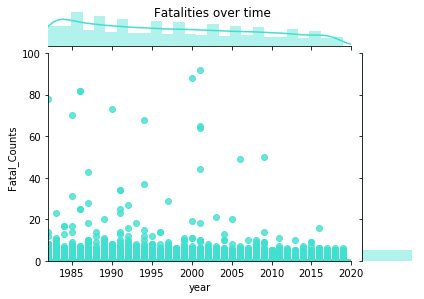

In [26]:
# Exploring time
g=0
g = sns.jointplot(data=dfState_full,x="year",y="Fatal_Counts",kind="reg",color="turquoise",xlim=[1982,2020],ylim=[0,100])
g.fig.suptitle('Fatalities over time')
g.fig.set_figwidth(6)
g.fig.set_figheight(4)

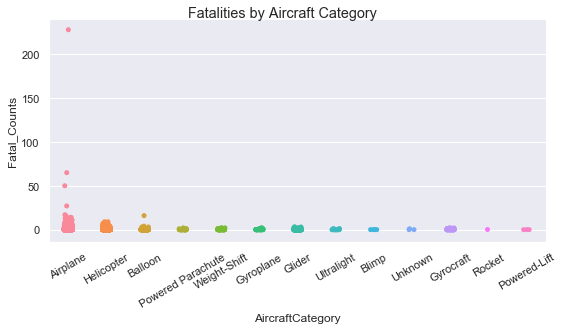

In [27]:
# Exploring Aircraft Category
sns.set()
dftemp = dfState_full.dropna(subset = ['AircraftCategory']).copy() 
g=0
g=sns.catplot(x='AircraftCategory', y='Fatal_Counts', data=dftemp, height=4, aspect=2)
g.fig.suptitle('Fatalities by Aircraft Category')
g.set_xticklabels(rotation=30)

#g.set_xticklabels(g.get_xticklabels(),rotation=45)

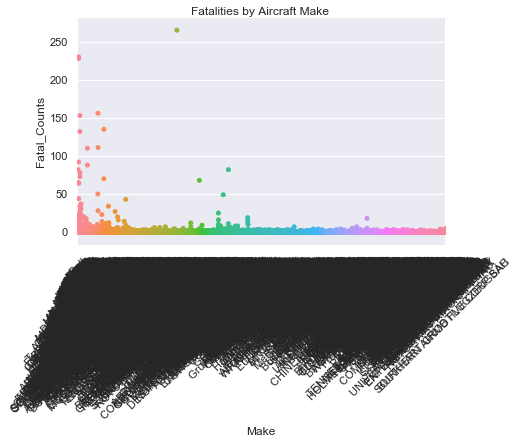

In [67]:
# Exploring Make
dftemp = dfState_full.dropna(subset = ['Make']).copy() 
g=0
g=sns.catplot(x='Make', y='Fatal_Counts', data=dftemp, height=4, aspect=2)
g.fig.suptitle('Fatalities by Aircraft Make')
g.set_xticklabels(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

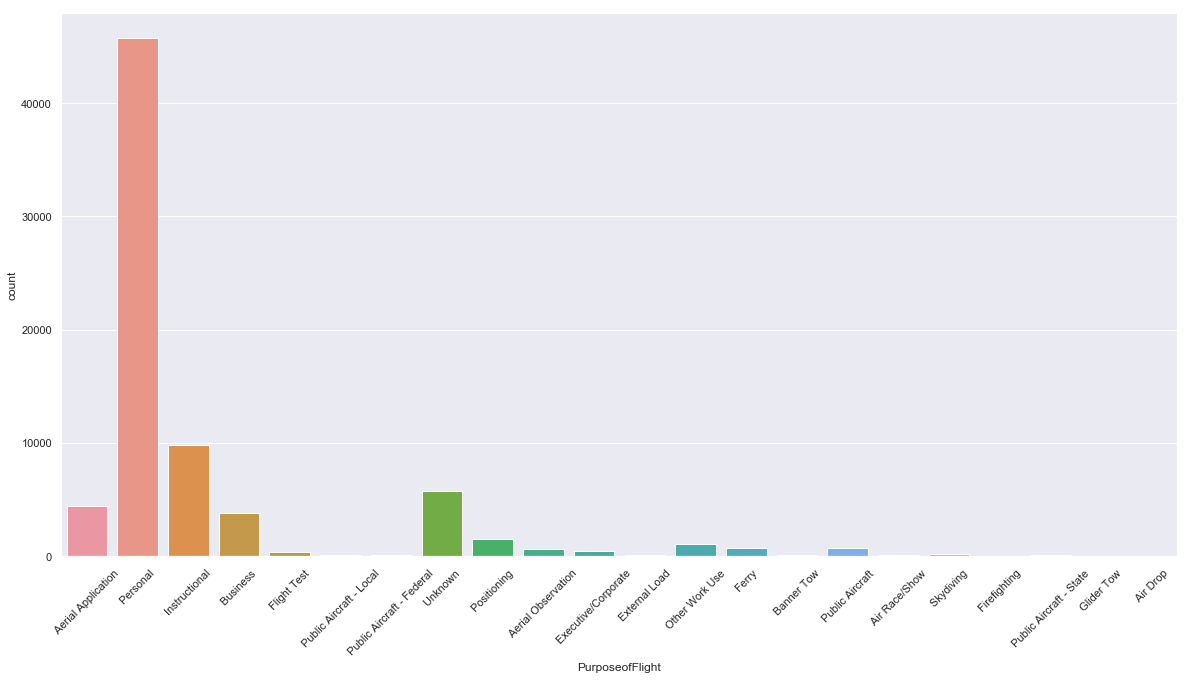

In [66]:
# Exploring Purpose of Flight
dftemp2 = dfState_full.dropna(subset = ['PurposeofFlight']).copy() 
g = sns.countplot(x='PurposeofFlight',data=dftemp2)
# g.fig.suptitle('Purpose of Flight')
plt.xticks(rotation=45)

Text(0.5, 0.98, 'Number of Engines')

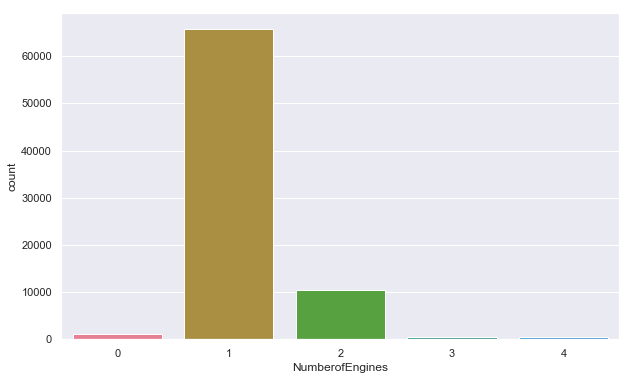

In [30]:
# Exploring Number of Engines
dftemp2 = df.dropna(subset = ['NumberofEngines']).copy() 
sns.set()
sns.set_palette("husl")
#sns.set_palette("bright")
sns.countplot(x='NumberofEngines',data=dftemp2)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Number of Engines')

''

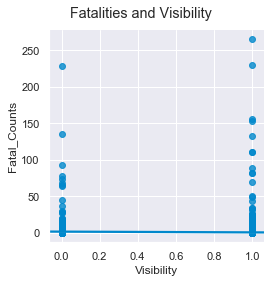

In [31]:
g = sns.PairGrid(dfState_full, y_vars=["Fatal_Counts"], x_vars=['Visibility'],height=4)
g.map(sns.regplot, color="#0088cc") 
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Fatalities and Visibility')
;



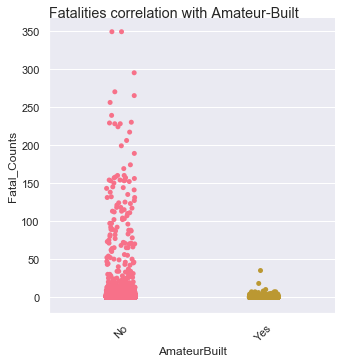

In [32]:
# Exploring Amateur Built
dftemp2 = df.dropna(subset = ['AmateurBuilt']).copy() 
g=0
g=sns.catplot(x='AmateurBuilt', y='Fatal_Counts', data=dftemp2)
g.fig.suptitle('Fatalities correlation with Amateur-Built')
g.set_xticklabels(rotation=45)

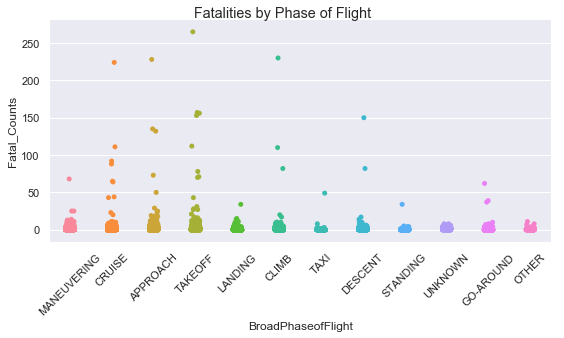

In [33]:
# Exploring Phase of Flight
dftemp2 = df.dropna(subset = ['BroadPhaseofFlight']).copy() 
g=0
g=sns.catplot(x='BroadPhaseofFlight', y='Fatal_Counts', data=dftemp2, height=4, aspect=2)
g.fig.suptitle('Fatalities by Phase of Flight')
g.set_xticklabels(rotation=45)

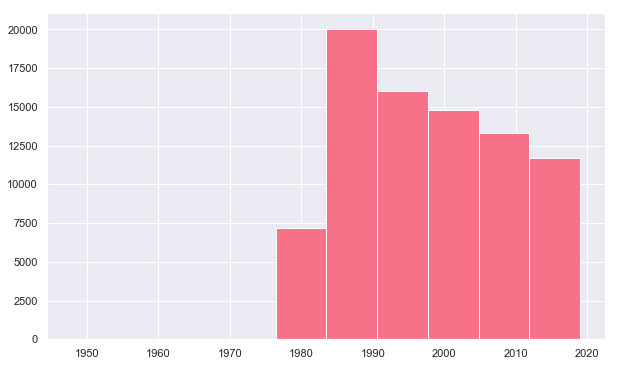

In [34]:
df['year'].hist()

In [54]:
# Function to calculate the total accidents in a category over time
def sum_over_time(df, category):
    totals = []
    keys = []
    years = []
    
    for k, g in df.groupby(['year', category]):
        (yr, cat) = k
        totals.append(len(g))
        keys.append(cat)
        years.append(yr)
        
    dict_to_plot = {
        category : keys,
        'Total': totals,
        'Year': years
    }
    
    return dict_to_plot

# Total Over time
t = sum_over_time(df, 'Fatal_Bool')

# Tracking fatalities over time
from bokeh.plotting import figure, output_file, show

x = t['Year']
t_df = pd.DataFrame(t)
p = figure(plot_width=800, plot_height=800, title ="Number of Accidents Reported")
# Fatal
fat = t_df[t_df['Fatal_Bool'] == 'Fatal']
# Unknown
uk = t_df[t_df['Fatal_Bool'] == 'Unknown']
# Nonfatal
nonfat = t_df[t_df['Fatal_Bool'] == 'Non-Fatal']
p.line(fat['Year'], fat['Total'] , legend="Fatal",
line_color="red")
p.line(uk['Year'], uk['Total'] , legend="Not Reported",
line_color="navy")
p.line(nonfat['Year'], nonfat['Total'] , legend="Not Fatal",
line_color="green")
show(p)

import matplotlib.pyplot as plt
%matplotlib inline  

plt.rcParams['figure.figsize'] = [20, 10]

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.rcParams['figure.figsize'] = [20, 10]

Text(0.5, 1.0, 'Correlation Plot')

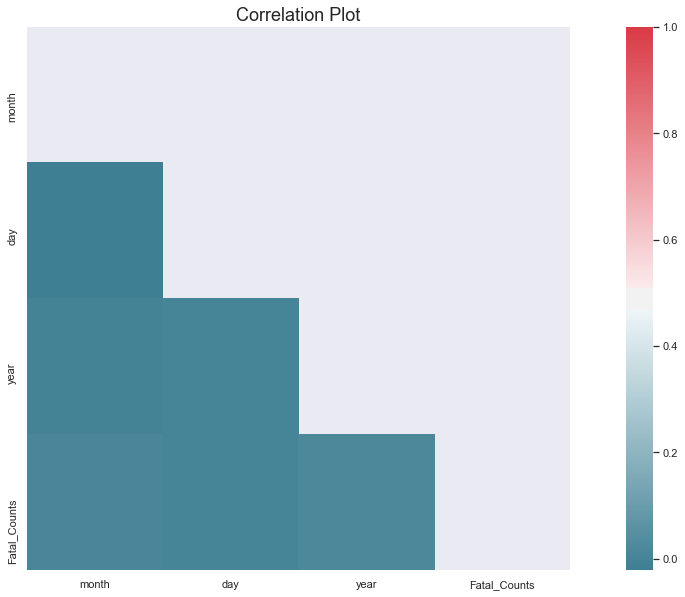

In [37]:
import seaborn as sns

# generate a correlation plot
corr = df.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plotting the heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, square = True, 
            xticklabels = corr.columns.values, yticklabels = corr.columns.values)
plt.title("Correlation Plot", fontsize = 18)

# Random Forest Model - Determining Informative Features for Fatality Within the US

In [38]:
model_data = df.copy() # copy from last revised data set for training/testing model
model_data = model_data[model_data['Country'] == ' United States ']
model_data = model_data[model_data['AircraftCategory'].isna() == False]
# seeing null values
print(len(model_data))
model_data.isna().sum()/len(model_data)

23619


EventId                 0.000000
InvestigationType       0.000127
AccidentNumber          0.000000
EventDate               0.000000
Location                0.000762
Country                 0.000000
Latitude                0.180787
Longitude               0.181252
AirportCode             0.332952
AirportName             0.205809
InjurySeverity          0.000000
AircraftDamage          0.024175
AircraftCategory        0.000000
RegistrationNumber      0.004615
Make                    0.000254
Model                   0.000847
AmateurBuilt            0.004657
NumberofEngines         0.028579
EngineType              0.043228
FARDescription          0.001482
Schedule                0.921758
PurposeofFlight         0.052923
AirCarrier              0.944960
TotalFatalInjuries      0.714128
TotalSeriousInjuries    0.732207
TotalMinorInjuries      0.683772
TotalUninjured          0.295144
WeatherCondition        0.013929
BroadPhaseofFlight      0.113426
ReportStatus            0.000000
Publicatio

##Preprocessing

In [39]:
# dropping unneeded columns and columns with too many null values
model_data = model_data.drop(columns = ['EventId', 'AccidentNumber', 'EventDate', 'Country', 'InvestigationType', 'AirportCode', 
                                        'RegistrationNumber', 'Schedule', 'AircraftDamage', 
                                        'AirCarrier', 'TotalFatalInjuries', 'TotalSeriousInjuries',
                                        'TotalMinorInjuries', 'TotalUninjured','ReportStatus',
                                        'PublicationDate', 'day', 'year', 'Fatal_Bool', 'InjurySeverity'
                                       ])
# rename Fatal_Counts Column
model_data.rename(columns={'Fatal_Counts':'FatalCounts'}, inplace=True)
# change certain columns to numeric
model_data['Latitude'] = pd.to_numeric(model_data['Latitude'])
model_data['Longitude'] = pd.to_numeric(model_data['Longitude'])
model_data['NumberofEngines'] = pd.to_numeric(model_data['NumberofEngines'])
# drops na values in FatalCounts and fill others numeric columns with mean value
model_data_fatal = model_data.dropna(subset = ['FatalCounts'])
model_data_fatal = model_data_fatal.fillna(model_data_fatal.mean())

In [40]:
model_data_fatal.isna().sum()

Location                13
Latitude                 0
Longitude                0
AirportName           4727
AircraftCategory         0
Make                     6
Model                   18
AmateurBuilt            85
NumberofEngines          0
EngineType             917
FARDescription           1
PurposeofFlight        942
WeatherCondition       231
BroadPhaseofFlight    2557
month                    0
FatalCounts              0
dtype: int64

In [41]:
# Use One Hot Encoding to encode categorical variables
model_data_fatal_enc = pd.get_dummies(model_data_fatal)
model_data_fatal_enc.shape

(22944, 28979)

##Training

In [42]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# split data into independent and dependent sets
X = model_data_fatal_enc
X = model_data_fatal_enc.drop(columns = ['FatalCounts'])
y = model_data_fatal_enc['FatalCounts'] 

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [43]:
from sklearn.ensemble import RandomForestRegressor
# fits a random forest model with 25 trees
clf = RandomForestRegressor(n_estimators=25, random_state=0, verbose = 2)  
clf.fit(X_train, y_train)  
y_pred = clf.predict(X_test)  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 30.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


In [44]:
from sklearn import metrics
# metrics for how well our model performed
print('Range:', model_data['FatalCounts'].max() - model_data['FatalCounts'].min())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Range: 228.0
Mean Absolute Error: 0.33712376525276005
Mean Squared Error: 1.8709101685066822
Root Mean Squared Error: 1.3678121831986592


In [45]:
features = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending=False)[:20]
features

Location_ NIMITZ HILL, GU                  0.243936
Model_ 747-300                             0.235675
AirportName_ AGANA INTERNATIONAL AIRPO     0.138717
WeatherCondition_IMC                       0.022914
BroadPhaseofFlight_LANDING                 0.016261
Latitude                                   0.007761
Longitude                                  0.007310
AirportName_ WEST WIND SPORT PARACHUTE     0.007008
Model_ DHC-3                               0.004428
month                                      0.004349
AirportName_ PRIVATE AIRPORT               0.003884
Location_ JENKINSBURG, GA                  0.003392
Model_ A100                                0.003188
BroadPhaseofFlight_MANEUVERING             0.003176
Location_ TAFT, CA                         0.003090
NumberofEngines                            0.002914
Model_ 65                                  0.002710
BroadPhaseofFlight_UNKNOWN                 0.002560
FARDescription_Part 137: Agricultural      0.002381
AircraftCate

No handles with labels found to put in legend.


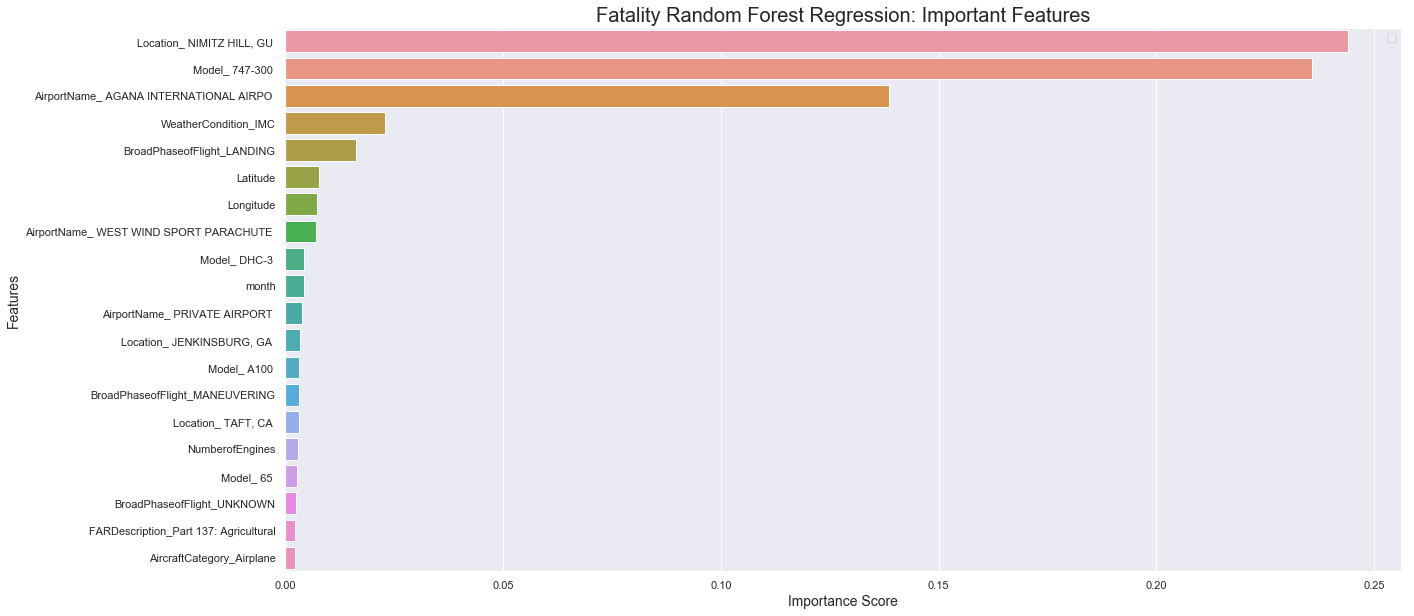

In [46]:
# Creating a bar plot
sns.barplot(x=features, y=features.index)
# Add labels to your graph
plt.xlabel('Importance Score', fontsize = 14)
plt.ylabel('Features', fontsize = 14)
plt.title("Fatality Random Forest Regression: Important Features", fontsize = 20)
plt.legend()
plt.show()

# Random Forest Model - Determining Informative Features for Aircraft Damage Within the US

In [47]:
model_data = df.copy() # copy from last revised data set for training/testing model
model_data = model_data[model_data['Country'] == ' United States ']
model_data = model_data[model_data['AircraftCategory'].isna() == False]
# dropping unneeded columns and columns with too many null values
model_data = model_data.drop(columns = ['EventId', 'AccidentNumber', 'EventDate', 'Country', 'InvestigationType', 'AirportCode', 
                                        'RegistrationNumber', 'Schedule', 'Fatal_Counts',
                                        'AirCarrier', 'TotalFatalInjuries', 'TotalSeriousInjuries',
                                        'TotalMinorInjuries', 'TotalUninjured','ReportStatus',
                                        'PublicationDate', 'day', 'year', 'Fatal_Bool', 'InjurySeverity'
                                       ])

# change certain columns to numeric
model_data['Latitude'] = pd.to_numeric(model_data['Latitude'])
model_data['Longitude'] = pd.to_numeric(model_data['Longitude'])
model_data['NumberofEngines'] = pd.to_numeric(model_data['NumberofEngines'])
# drops na values in AircraftDamage and fill others numeric columns with mean value
model_data_damage = model_data.dropna(subset = ['AircraftDamage'])
model_data_damage = model_data_damage.fillna(model_data_damage.mean())
model_data_damage.isna().sum()


Location                12
Latitude                 0
Longitude                0
AirportName           4695
AircraftDamage           0
AircraftCategory         0
Make                     6
Model                   19
AmateurBuilt            95
NumberofEngines          0
EngineType             861
FARDescription           4
PurposeofFlight        964
WeatherCondition       264
BroadPhaseofFlight    2562
month                    0
dtype: int64

In [48]:
# encoding Aircraft Damage into numeric values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(model_data_damage['AircraftDamage'])
model_data_damage.AircraftDamage = le.transform(model_data_damage.AircraftDamage)
model_data_damage.dtypes

Location               object
Latitude              float64
Longitude             float64
AirportName            object
AircraftDamage          int32
AircraftCategory       object
Make                   object
Model                  object
AmateurBuilt           object
NumberofEngines       float64
EngineType             object
FARDescription         object
PurposeofFlight        object
WeatherCondition       object
BroadPhaseofFlight     object
month                   int64
dtype: object

In [49]:
# use One Hot Encoding to encode categorical variables
model_data_damage_enc = pd.get_dummies(model_data_damage)
print(model_data_damage_enc.shape)

# import train_test_split function
from sklearn.model_selection import train_test_split

# split data into independent and dependent sets
X = model_data_damage_enc
X = model_data_damage_enc.drop(columns = ['AircraftDamage'])
y = model_data_damage_enc['AircraftDamage'] 

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

(23048, 29070)


In [50]:
from sklearn.ensemble import RandomForestClassifier
# fits a random forest model with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=0, verbose = 2, class_weight = "balanced_subsample")  
clf.fit(X_train, y_train)  
y_pred = clf.predict(X_test) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


In [51]:
y_test = le.inverse_transform(y_test)
y_pred = le.inverse_transform(y_pred)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test,y_pred))
print()
print('Classifcation Metrics')
print(metrics.classification_report(y_test,y_pred))  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Confusion Matrix
[[  65    3  747]
 [   1   21  152]
 [  42    9 5875]]

Classifcation Metrics
              precision    recall  f1-score   support

   Destroyed       0.60      0.08      0.14       815
       Minor       0.64      0.12      0.20       174
 Substantial       0.87      0.99      0.93      5926

   micro avg       0.86      0.86      0.86      6915
   macro avg       0.70      0.40      0.42      6915
weighted avg       0.83      0.86      0.81      6915

Accuracy: 0.8620390455531454


In [52]:
features = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending=False)[:20]
features

Latitude                                    0.035385
Longitude                                   0.035077
month                                       0.026394
EngineType_ Reciprocating                   0.024553
BroadPhaseofFlight_LANDING                  0.022536
NumberofEngines                             0.021700
FARDescription_Part 121: Air Carrier        0.015360
FARDescription_Part 91: General Aviation    0.014426
BroadPhaseofFlight_MANEUVERING              0.012363
WeatherCondition_VMC                        0.012309
PurposeofFlight_ Personal                   0.011733
EngineType_ Turbo Fan                       0.011366
WeatherCondition_IMC                        0.010038
BroadPhaseofFlight_TAXI                     0.010011
BroadPhaseofFlight_STANDING                 0.007939
BroadPhaseofFlight_CRUISE                   0.007691
BroadPhaseofFlight_TAKEOFF                  0.006955
AirportName_ N/A                            0.006931
Make_ BOEING                                0.

No handles with labels found to put in legend.


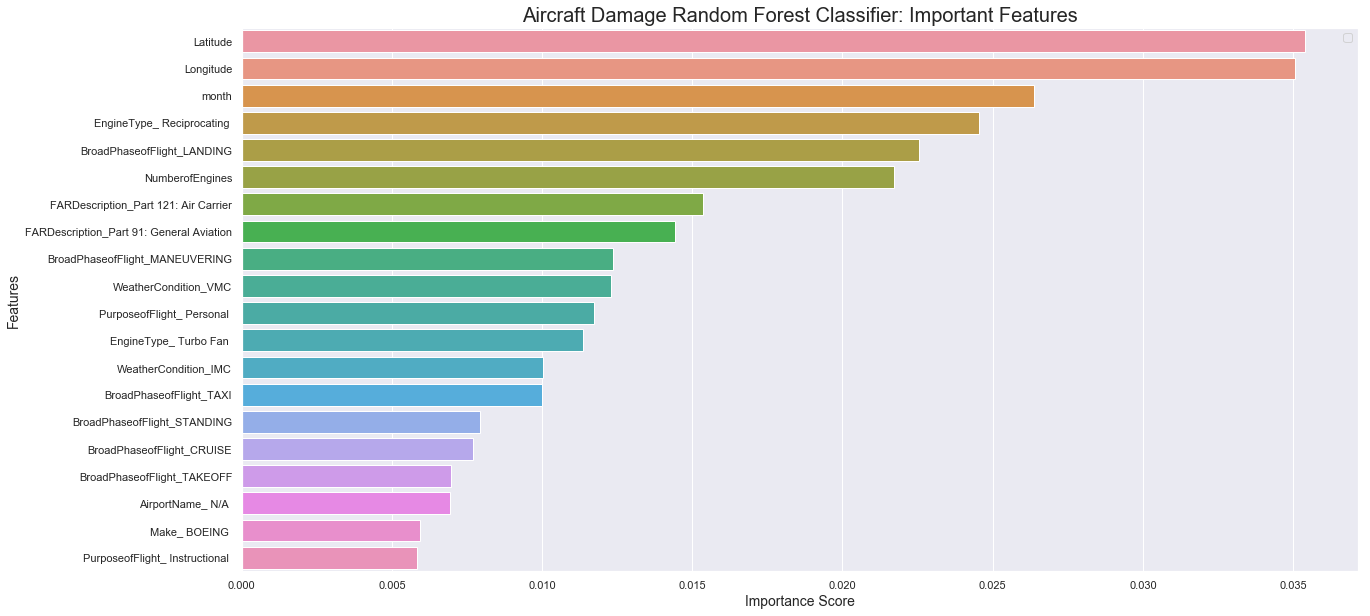

In [53]:
# Creating a bar plot
sns.barplot(x=features, y=features.index)
# Add labels to your graph
plt.xlabel('Importance Score', fontsize = 14)
plt.ylabel('Features', fontsize = 14)
plt.title("Aircraft Damage Random Forest Classifier: Important Features", fontsize = 20)
plt.legend()
plt.show()